# **Connect BigQuery and Get Data**



In [ ]:
# libraries that we need
from google.cloud import bigquery
from google.colab import auth

# authenticate
auth.authenticate_user()

# initialize the client for BigQuery
project_id = 'sales-data-analysis-449003'
client = bigquery.Client(project = project_id, location = 'US')

In [ ]:
# get the dataset and table
dataset_ref = client.dataset(dataset_id = 'transactional_data', project = project_id)
dataset = client.get_dataset(dataset_ref)

table_ref = dataset.table('sales_table')
table = client.get_table(table_ref)
table.schema

[SchemaField('OrderNumber', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('OrderDate', 'DATETIME', 'NULLABLE', None, None, (), None),
 SchemaField('Ship Date', 'DATETIME', 'NULLABLE', None, None, (), None),
 SchemaField('Customer Name Index', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Channel', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('Currency Code', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('Warehouse Code', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('Delivery Region Index', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Product Description Index', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Order Quantity', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Unit Price', 'FLOAT', 'NULLABLE', None, None, (), None),
 SchemaField('Total Unit Cost', 'FLOAT', 'NULLABLE', None, None, (), None),
 SchemaField('Total Revenue', 'FLOAT', 'NULLABLE', None, None, (), None),
 SchemaFi

In [ ]:
# convert to dataframe
sales_data = client.list_rows(table = table).to_dataframe()
type(sales_data)

pandas.core.frame.DataFrame

In [ ]:
# libraries that we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [ ]:
sales_data.head()

,OrderNumber,OrderDate,Ship Date,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Total Unit Cost,Total Revenue,Customer Names,Product Name,Suburb,City,postcode,Longitude,Latitude,Full Address,Total Cost,Profit,Shipping Duration
0,SO - 0003309,2017-04-11,2017-04-20,37,Export,NZD,AXW291,1,1,7,2351.700,1622.67300,16461.900,AuroMedics Corp,Product 1,Freemans Bay,Auckland,1011,174.748652,-36.855732,"Picton Street, Freemans Bay, Auckland",11358.71,5103.19,9
1,SO - 0004862,2017-05-01,2017-05-07,34,Distributor,NZD,AXW291,1,1,9,1688.400,1063.69200,15195.600,OUR Ltd,Product 1,Freemans Bay,Auckland,1011,174.748652,-36.855732,"Picton Street, Freemans Bay, Auckland",9573.23,5622.37,6
2,SO - 0006968,2017-07-30,2017-08-06,29,Distributor,NZD,AXW291,1,1,8,3999.900,3319.91700,31999.200,"Apotheca, Ltd",Product 1,Freemans Bay,Auckland,1011,174.748652,-36.855732,"Picton Street, Freemans Bay, Auckland",26559.34,5439.86,7
3,SO - 0001688,2017-12-30,2018-01-05,49,Wholesale,NZD,AXW291,1,1,9,1922.900,1480.63300,17306.100,Bare,Product 1,Freemans Bay,Auckland,1011,174.748652,-36.855732,"Picton Street, Freemans Bay, Auckland",13325.70,3980.40,6
4,SO - 0002460,2018-01-14,2018-01-20,34,Wholesale,NZD,AXW291,1,1,7,11150.475,9254.89425,78053.325,OUR Ltd,Product 1,Freemans Bay,Auckland,1011,174.748652,-36.855732,"Picton Street, Freemans Bay, Auckland",64784.26,13269.06,6


In [ ]:
sales_data.columns

Index(['OrderNumber', 'OrderDate', 'Ship Date', 'Customer Name Index',
       'Channel', 'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Price',
       'Total Unit Cost', 'Total Revenue', 'Customer Names', 'Product Name',
       'Suburb', 'City', 'postcode', 'Longitude', 'Latitude', 'Full Address',
       'Total Cost', 'Profit', 'Shipping Duration'],
      dtype='object')

# **EDA and Feature Engineering**

In [ ]:
# taking necessary columns
df = sales_data[['Channel', 'Suburb', 'Shipping Duration', 'Order Quantity', 'Total Cost', 'Total Revenue']]

df.head()

,Channel,Suburb,Shipping Duration,Order Quantity,Total Cost,Total Revenue
0,Export,Freemans Bay,9,7,11358.71,16461.900
1,Distributor,Freemans Bay,6,9,9573.23,15195.600
2,Distributor,Freemans Bay,7,8,26559.34,31999.200
3,Wholesale,Freemans Bay,6,9,13325.70,17306.100
4,Wholesale,Freemans Bay,6,7,64784.26,78053.325


In [ ]:
df.dtypes

,0
Channel,object
Suburb,object
Shipping Duration,Int64
Order Quantity,Int64
Total Cost,float64
Total Revenue,float64


In [ ]:
# check the unique values distrinution of the categorical variables
for col in df.select_dtypes(include=['object']).columns:
  print(f"Unique values count of categorical features:\nFor {col} column: {df[col].value_counts(normalize = True)}\n")

Unique values count of categorical features:
For Channel column: Channel
Wholesale      0.536353
Distributor    0.314103
Export         0.149543
Name: proportion, dtype: float64

Unique values count of categorical features:
For Suburb column: Suburb
Dannemora         0.030659
Henderson         0.028407
Tokoroa           0.022901
Tapanui           0.022150
Chartwell         0.021774
                    ...   
Pleasant Point    0.008009
Frimley           0.007884
Ebdentown         0.007759
Dinsdale          0.007759
Barrington        0.007508
Name: proportion, Length: 87, dtype: float64



**The frequency of values in the 'Suburb' column is very low, and having too many labels can make the model more complex. So, drop that column.**

In [ ]:
df.drop('Suburb', axis = 1, inplace = True)
df.shape

<ipython-input-10-fd4a10b7bb3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Suburb', axis = 1, inplace = True)


(7991, 5)

In [ ]:
# one hot encode the 'Channel' column
df = pd.get_dummies(df, drop_first=True).astype(int)
df.head()

,Shipping Duration,Order Quantity,Total Cost,Total Revenue,Channel_Export,Channel_Wholesale
0,9,7,11358,16461,1,0
1,6,9,9573,15195,0,0
2,7,8,26559,31999,0,0
3,6,9,13325,17306,0,1
4,6,7,64784,78053,0,1


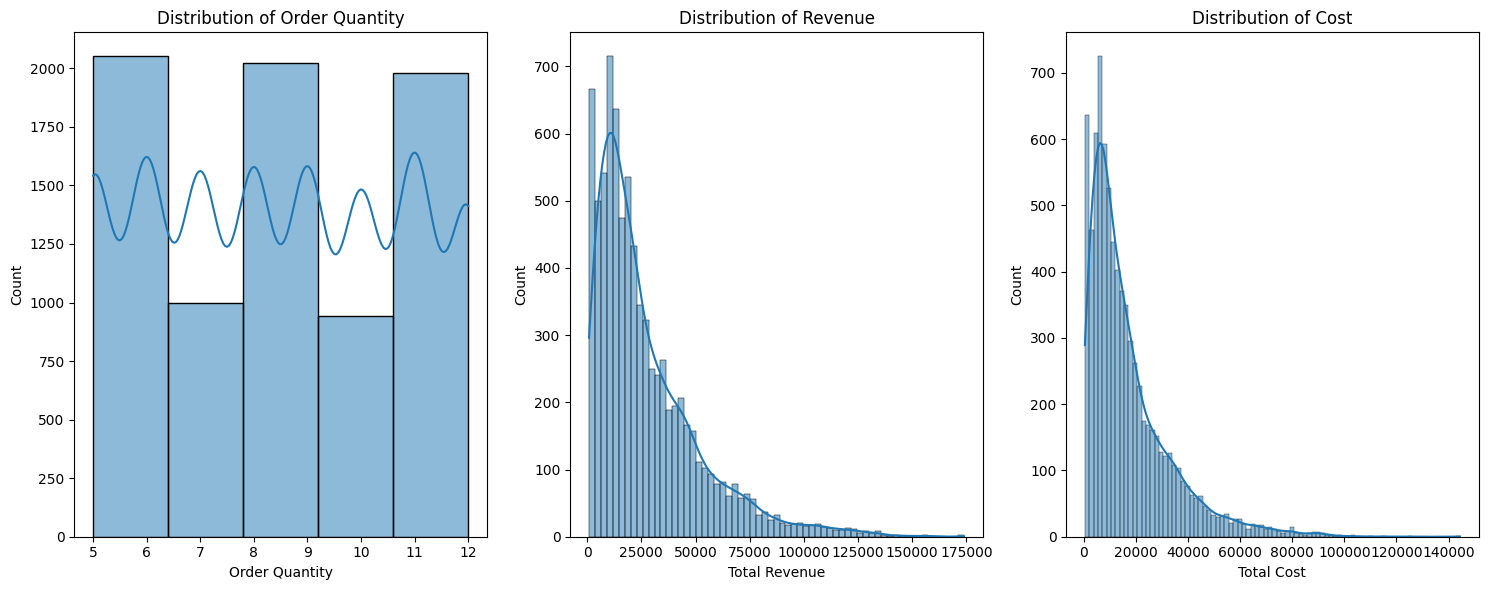

In [ ]:
# visualize the distributions of 'Order Quantity,' 'Total Revenue,' and 'Total Cost
fig, ax = plt.subplots(1, 3, figsize = (15, 6))

sns.histplot(data = df, x = 'Order Quantity', kde = True, bins = 5, ax = ax[0])
ax[0].set_title('Distribution of Order Quantity')

sns.histplot(data = df, x = 'Total Revenue', kde = True, ax = ax[1])
ax[1].set_title('Distribution of Revenue')

sns.histplot(data = df, x = 'Total Cost', kde = True, ax = ax[2])
ax[2].set_title('Distribution of Cost')

plt.tight_layout()
plt.show()

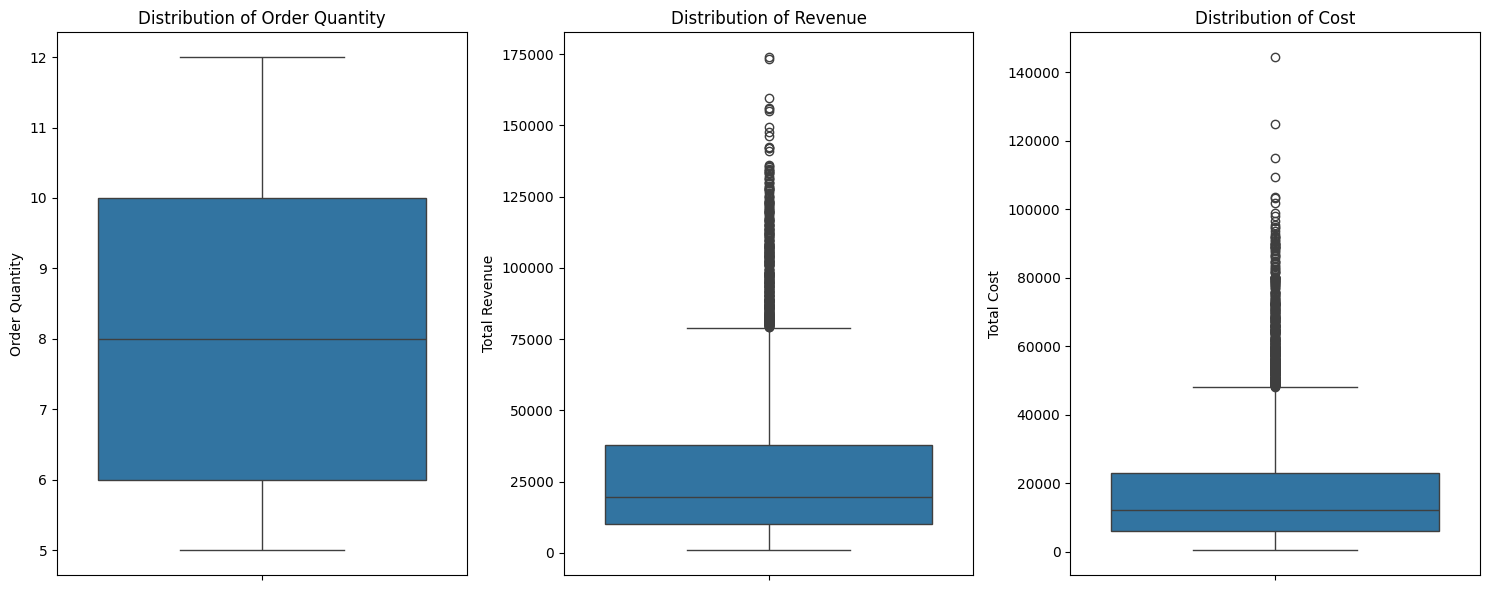

In [ ]:
# visualize the distributions of 'Order Quantity,' 'Total Revenue,' and 'Total Cost on different quantiles
fig, ax = plt.subplots(1, 3, figsize = (15, 6))

sns.boxplot(data = df, y = 'Order Quantity', ax = ax[0])
ax[0].set_title('Distribution of Order Quantity')

sns.boxplot(data = df, y = 'Total Revenue', ax = ax[1])
ax[1].set_title('Distribution of Revenue')

sns.boxplot(data = df, y = 'Total Cost', ax = ax[2])
ax[2].set_title('Distribution of Cost')

plt.tight_layout()
plt.show()

In [ ]:
# check for the outliers using 75th to maximum values of 'Total Revenue', 'Total Cost'
def quantile_data(data, column):
  print(f"""For column: {column}:\n
  75th Quantile: {data[column].quantile(0.75)},
  90th Quantile: {data[column].quantile(0.90)},
  95th Quantile: {data[column].quantile(0.95)},
  99th Quantile: {data[column].quantile(0.99)},
  99.5th Quantile: {data[column].quantile(0.995)},
  Max value: {data[column].max()}\n""")

for col in ['Total Revenue', 'Total Cost']:
  quantile_data(data = df, column = col)

For column: Total Revenue:

  75th Quantile: 37707.0,
  90th Quantile: 60220.0,
  95th Quantile: 76206.0,
  99th Quantile: 114933.60000000006,
  99.5th Quantile: 125089.60000000003,
  Max value: 173952

For column: Total Cost:

  75th Quantile: 22903.5,
  90th Quantile: 37936.0,
  95th Quantile: 49426.5,
  99th Quantile: 75570.80000000002,
  99.5th Quantile: 84615.80000000003,
  Max value: 144380



**Since the largest differences occur between 99 and the maximum value, treat values above the 99.1th percentile as outliers.**

In [ ]:
for col in ['Total Revenue', 'Total Cost']:
  df = df[df[col] <= df[col].quantile(0.991)]

for col in ['Total Revenue', 'Total Cost']:
  quantile_data(data = df, column = col)

For column: Total Revenue:

  75th Quantile: 35982.5,
  90th Quantile: 56010.400000000016,
  95th Quantile: 69763.0,
  99th Quantile: 93214.34,
  99.5th Quantile: 101432.86999999998,
  Max value: 116358

For column: Total Cost:

  75th Quantile: 21951.5,
  90th Quantile: 35708.20000000001,
  95th Quantile: 44482.29999999999,
  99th Quantile: 60714.0,
  99.5th Quantile: 64759.61999999995,
  Max value: 70027



In [ ]:
df.head()

,Shipping Duration,Order Quantity,Total Cost,Total Revenue,Channel_Export,Channel_Wholesale
0,9,7,11358,16461,1,0
1,6,9,9573,15195,0,0
2,7,8,26559,31999,0,0
3,6,9,13325,17306,0,1
4,6,7,64784,78053,0,1


In [ ]:
df.shape

(7847, 6)

**144 data has been deleted.**

In [ ]:
# separate the dependent (y) and the independent (X) variables/features
X = df.drop('Total Revenue', axis = 1)
y = df['Total Revenue']

In [ ]:
# split the dataset into training set (70% data) and testing set (30% data)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)
X_train.shape, X_test.shape

((5492, 5), (2355, 5))

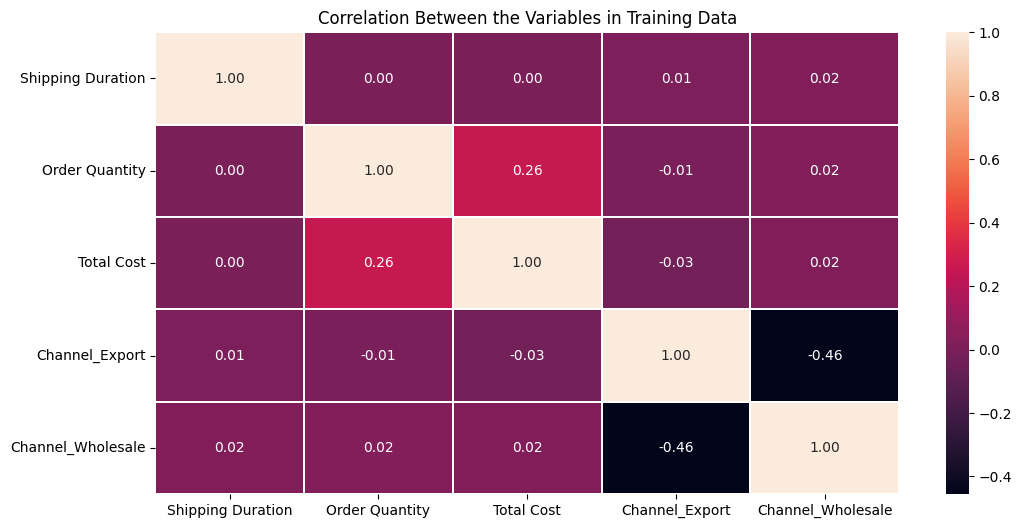

In [ ]:
# visualize the correlation between the independent features in the training data
plt.figure(figsize = (12, 6))
sns.heatmap(X_train.corr(), annot = True, linewidths=.2, fmt='.2f')
plt.title('Correlation Between the Variables in Training Data')
plt.show()

The heatmap shows the correlation matrix for variables in the training data. Key observations:  

- **Order Quantity and Total Cost** have a moderate positive correlation (0.26).  
- **Channel_Export and Channel_Wholesale** have a strong negative correlation (-0.46).  
- Other variables show weak or no significant correlation with each other.  

In [ ]:
# take a copy of the training and testing data for feature selection
X_train_fs, X_test_fs = X_train.copy(), X_test.copy()
X_train_fs.shape, X_test_fs.shape

((5492, 5), (2355, 5))

In [ ]:
# scaling (normalizing) the data
from sklearn.preprocessing import StandardScaler

def scaling(train_x, test_x, columns=None):
  """
  Scales the specified columns of the training and testing data using StandardScaler.

  This function fits a StandardScaler on the training data and transforms both the
  training and testing data using the fitted scaler.  It's crucial to fit only
  on the training data to prevent data leakage from the test set.

  Args:
    train_x (pandas.DataFrame): The training data.
    test_x (pandas.DataFrame): The testing data.
    columns (list, optional): A list of column names to scale. If None, all
    columns of the DataFrames are scaled. Defaults to None.

  Returns:
    tuple: A tuple containing the fitted StandardScaler, the scaled training data, and the scaled testing data.
  """
  scaler = StandardScaler()

  if columns is None:
    columns = train_x.columns  # Scale all columns if none are specified

  train_x[columns] = scaler.fit_transform(train_x[columns])
  test_x[columns] = scaler.transform(test_x[columns])

  return scaler, train_x, test_x

In [ ]:
X_train_fs.head(3)

,Shipping Duration,Order Quantity,Total Cost,Channel_Export,Channel_Wholesale
3843,10,11,36912,1,0
1493,13,8,10354,0,1
5892,16,9,7070,0,0


In [ ]:
# call the scaling function on the training and testing data for feature selection
scaler_fs, X_train_fs, X_test_fs = scaling(X_train_fs, X_test_fs, columns = X_train_fs.columns)
X_train_fs.head(3)

,Shipping Duration,Order Quantity,Total Cost,Channel_Export,Channel_Wholesale
3843,-0.092713,1.137920,1.572228,2.378438,-1.08360
1493,0.566560,-0.183411,-0.400673,-0.420444,0.92285
5892,1.225833,0.257032,-0.644630,-0.420444,-1.08360


In [ ]:
X_test_fs.head(3)

,Shipping Duration,Order Quantity,Total Cost,Channel_Export,Channel_Wholesale
4399,-0.092713,1.578364,-0.611276,-0.420444,-1.08360
2202,-0.971743,1.578364,-0.507126,-0.420444,0.92285
4344,-0.751986,0.257032,0.030560,-0.420444,0.92285


### **Feature Selection Method->(VIF):**

The Variance Inflation Factor (VIF) is a measure of multicollinearity in regression analysis.  It quantifies how much the variance of an estimated regression coefficient is increased due to multicollinearity.  In simpler terms, it tells you how much the presence of other correlated predictor variables inflates the standard errors of a particular coefficient.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

numerical_cols = X_train_fs.columns  # Get a list of all column names from the X_train_fs DataFrame.
X_train_num = X_train_fs[numerical_cols] # Create a new DataFrame, X_train_num, containing only the columns specified in numerical_cols.

In [ ]:
# create a function for calculating the vif
def calculate_vif(data):
  """
  Calculate the Variance Inflation Factor (VIF) for each feature in a given dataset.

  Parameters:
  ----------
  data : pandas.DataFrame
    A DataFrame containing the numerical features for which VIF needs to be calculated.

  Returns:
  -------
  pandas.DataFrame
     A DataFrame with two columns:
    - 'Feature': The name of the feature.
    - 'VIF': The calculated VIF value for that feature.

  Notes:
  ------
  - High VIF values (commonly >5 or >10) indicate multicollinearity among features.
  - Ensure the input DataFrame `data` contains only numerical features, as VIF is not defined for categorical data.
  """

  vif_data = pd.DataFrame()
  vif_data['Feature'] = data.columns
  vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
  return vif_data

In [ ]:
vif = calculate_vif(X_train_num)
print("VIF")
print(vif)

VIF
             Feature       VIF
0  Shipping Duration  1.000577
1     Order Quantity  1.072775
2         Total Cost  1.073086
3     Channel_Export  1.262985
4  Channel_Wholesale  1.263286


The Variance Inflation Factor (VIF) values for all features are low (close to 1), indicating that multicollinearity is not a concern in this dataset. Since no feature exceeds the common thresholds of **VIF > 5 or >10**, all features can be retained without concerns about redundancy or collinearity.

In [ ]:
X_train.head(3)

,Shipping Duration,Order Quantity,Total Cost,Channel_Export,Channel_Wholesale
3843,10,11,36912,1,0
1493,13,8,10354,0,1
5892,16,9,7070,0,0


In [ ]:
# perform the scaling on the real train and test data
scaler, X_train_scaled, X_test_scaled = scaling(X_train, X_test, columns = X_train.columns)
X_train_scaled.head(3)

,Shipping Duration,Order Quantity,Total Cost,Channel_Export,Channel_Wholesale
3843,-0.092713,1.137920,1.572228,2.378438,-1.08360
1493,0.566560,-0.183411,-0.400673,-0.420444,0.92285
5892,1.225833,0.257032,-0.644630,-0.420444,-1.08360


In [ ]:
X_test_scaled.head(3)

,Shipping Duration,Order Quantity,Total Cost,Channel_Export,Channel_Wholesale
4399,-0.092713,1.578364,-0.611276,-0.420444,-1.08360
2202,-0.971743,1.578364,-0.507126,-0.420444,0.92285
4344,-0.751986,0.257032,0.030560,-0.420444,0.92285


In [ ]:
X_train_scaled.shape, X_test_scaled.shape

((5492, 5), (2355, 5))

# **Model Building**

In [ ]:
from sklearn.linear_model import LinearRegression # import the Linear Regression model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # import the performance metrics

In [ ]:
def adjusted_r2(r2, n, p):
  """
  Calculates the adjusted R-squared value. The adjusted R-squared is a modified version of R-squared that accounts for the number of predictors in the
  model. It penalizes models with a large number of predictors, helping to prevent overfitting.

  Args:
    r2: The R-squared value.
    n: The number of data points.
    p: The number of predictors (independent variables).

  Returns:
    The adjusted R-squared value.
  """

  return 1 - ((1 - r2) * (n - 1) / (n - p - 1))

In [ ]:
def build_evaluate_model(model, model_name, train_x, train_y, test_x, test_y):
  """
  Builds, trains, evaluates, and visualizes the performance of a machine learning model.

  Args:
    model: An sklearn machine learning model object.
    model_name: A string representing the name of the model.
    train_x: A pandas DataFrame containing the training features.
    train_y: A pandas Series containing the training target labels.
    test_x: A pandas DataFrame containing the testing features.
    test_y: A pandas Series containing the testing target labels.

  Returns:
    tuple: A tuple containing the trained machine learning model object and the predictions on the test set.

  Prints:
    Training score of the model on the training data.
    Mean Absolute Error of the model on the testing data.
    Mean Squared Error of the model on the testing data.
    R-squared score of the model on the testing data.
    Adjusted R-squared score of the model on the testing data.
    A scatter plot of actual vs. predicted values on the testing data.
  """
  model_ = model.fit(train_x, train_y)
  print(f"Training Score for {model_name}: {model_.score(train_x, train_y)}\n")

  pred = np.rint(model_.predict(test_x)).astype(int)

  print(f"Mean Absolute Error for {model_name}: {mean_absolute_error(test_y, pred)}\n")

  print(f"Mean Squared Error for {model_name}: {mean_squared_error(test_y, pred)}\n")

  print(f"R-Squared Score for {model_name}: {r2_score(test_y, pred)}\n")

  r2 = r2_score(test_y, pred)
  n = test_x.shape[0]
  p = test_x.shape[1]

  r2_adj = adjusted_r2(r2, n, p)
  print(f"Adjusted R²: {r2_adj}")

  # Plot actual vs predicted values
  plt.figure(figsize=(10, 6))
  plt.scatter(test_y, pred, alpha=0.6, color='blue', label='Predicted vs Actual')
  plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], color='red', linestyle='--', label='Perfect Prediction')
  plt.title('Actual vs Predicted Values')
  plt.xlabel('Actual Revenue')
  plt.ylabel('Predicted Revenue')
  plt.legend()
  plt.show()

  return model_, pred

Training Score for Linear Regression: 0.8985756611818551

Mean Absolute Error for Linear Regression: 4685.3341825902335

Mean Squared Error for Linear Regression: 46133314.14946921

R-Squared Score for Linear Regression: 0.9006157846355649

Adjusted R²: 0.9004042388387057


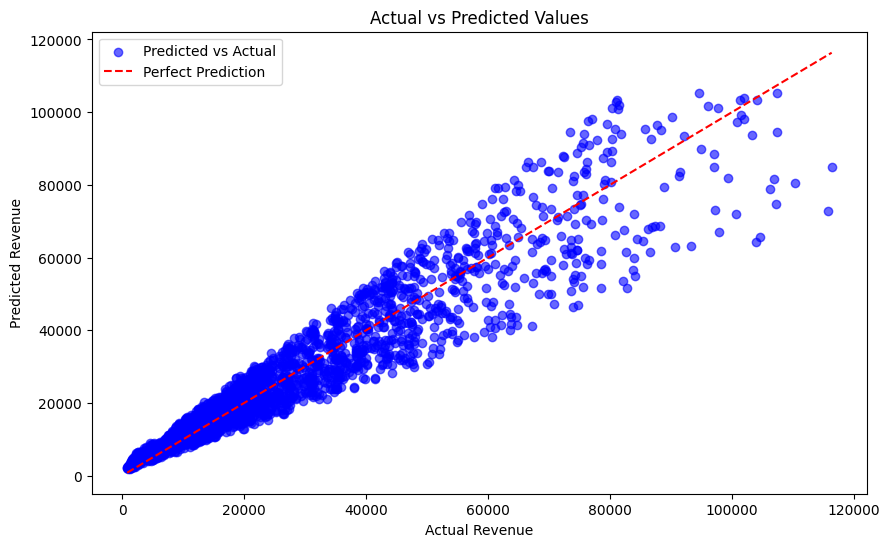

In [ ]:
lr_model, predictions = build_evaluate_model(model = LinearRegression(), model_name = 'Linear Regression', train_x = X_train_scaled, train_y = y_train,
                                             test_x = X_test_scaled, test_y = y_test)

The model shows a strong fit with a training score and R-squared around **0.9**.  The relatively **low** Mean Absolute Error (MAE) and Mean Squared Error (MSE) further support this.  The actual vs. predicted plot visually confirms the **good** fit, with points **tightly** clustered around the **perfect** prediction line. Overall, the linear regression model performs **well** on this data.

In [ ]:
type(y_test), type(predictions)

(pandas.core.series.Series, numpy.ndarray)

In [ ]:
# create a prediction dataframe which contains the actual and predicted revenue
prediction_data = pd.DataFrame()
prediction_data['Actual Revenue'] = y_test.values
prediction_data['Predicted Revenue'] = predictions
prediction_data.head()

,Actual Revenue,Predicted Revenue
0,13426,14446
1,11738,16164
2,22759,25898
3,39320,34811
4,1800,3438


In [ ]:
X_test[:5]

,Shipping Duration,Order Quantity,Total Cost,Channel_Export,Channel_Wholesale
4399,-0.092713,1.578364,-0.611276,-0.420444,-1.08360
2202,-0.971743,1.578364,-0.507126,-0.420444,0.92285
4344,-0.751986,0.257032,0.030560,-0.420444,0.92285
1938,1.665348,0.697476,0.436684,2.378438,-1.08360
1479,0.786318,-1.064299,-1.084258,-0.420444,-1.08360


In [ ]:
# Inverse transform to get the original values of X_test
X_test_original = scaler.inverse_transform(X_test_scaled)
X_test_original = pd.DataFrame(X_test_original, columns=X_test.columns)
X_test_original.head()

,Shipping Duration,Order Quantity,Total Cost,Channel_Export,Channel_Wholesale
0,10.0,12.0,7519.0,0.0,0.0
1,6.0,12.0,8921.0,0.0,1.0
2,7.0,9.0,16159.0,0.0,1.0
3,18.0,10.0,21626.0,1.0,0.0
4,14.0,6.0,1152.0,0.0,0.0


In [ ]:
X_test_original.shape[0], prediction_data.shape[0]

(2355, 2355)

In [ ]:
# concat the prediction dataframe and the test features data to create a prediction table
prediction_table = pd.concat([X_test_original, prediction_data], axis = 1)
prediction_table.head()

,Shipping Duration,Order Quantity,Total Cost,Channel_Export,Channel_Wholesale,Actual Revenue,Predicted Revenue
0,10.0,12.0,7519.0,0.0,0.0,13426,14446
1,6.0,12.0,8921.0,0.0,1.0,11738,16164
2,7.0,9.0,16159.0,0.0,1.0,22759,25898
3,18.0,10.0,21626.0,1.0,0.0,39320,34811
4,14.0,6.0,1152.0,0.0,0.0,1800,3438


In [ ]:
prediction_table.columns

Index(['Shipping Duration', 'Order Quantity', 'Total Cost', 'Channel_Export',
       'Channel_Wholesale', 'Actual Revenue', 'Predicted Revenue'],
      dtype='object')

In [ ]:
# exclude the floating points
prediction_table = prediction_table.astype(int)
prediction_table.head(2)

,Shipping Duration,Order Quantity,Total Cost,Channel_Export,Channel_Wholesale,Actual Revenue,Predicted Revenue
0,10,12,7519,0,0,13426,14446
1,6,12,8921,0,1,11738,16164


In [ ]:
# Recreate the original 'Channel' column
prediction_table['Channel'] = np.select(
    [
        prediction_table['Channel_Export'] == 1,
        prediction_table['Channel_Wholesale'] == 1
    ],
    ['Export', 'Wholesale'],  # Corresponding values for each condition
    default='Distributor'  # Default value if none of the conditions match
)

# Drop the dummy-encoded columns
prediction_table.drop(['Channel_Export', 'Channel_Wholesale'], axis=1, inplace=True)

prediction_table.head()

,Shipping Duration,Order Quantity,Total Cost,Actual Revenue,Predicted Revenue,Channel
0,10,12,7519,13426,14446,Distributor
1,6,12,8921,11738,16164,Wholesale
2,7,9,16159,22759,25898,Wholesale
3,18,10,21626,39320,34811,Export
4,14,6,1152,1800,3438,Distributor


In [ ]:
# Move the 'Channel' column to the beginning
columns = ['Channel'] + [col for col in prediction_table.columns if col != 'Channel']
prediction_table = prediction_table[columns]

prediction_table.head()

,Channel,Shipping Duration,Order Quantity,Total Cost,Actual Revenue,Predicted Revenue
0,Distributor,10,12,7519,13426,14446
1,Wholesale,6,12,8921,11738,16164
2,Wholesale,7,9,16159,22759,25898
3,Export,18,10,21626,39320,34811
4,Distributor,14,6,1152,1800,3438


In [ ]:
# create a feature importance table
feature_table = pd.DataFrame()
feature_table['Features'] = lr_model.feature_names_in_
feature_table['Importance'] = lr_model.coef_
feature_table

,Features,Importance
0,Shipping Duration,79.640919
1,Order Quantity,665.184421
2,Total Cost,19705.276007
3,Channel_Export,57.262120
4,Channel_Wholesale,-131.839897


In [ ]:
# Apply log transformation to the absolute values of the Importance column
feature_table['Importance'] = np.log1p(np.abs(feature_table['Importance']))
feature_table

,Features,Importance
0,Shipping Duration,4.390006
1,Order Quantity,6.501567
2,Total Cost,9.888692
3,Channel_Export,4.064952
4,Channel_Wholesale,4.889145


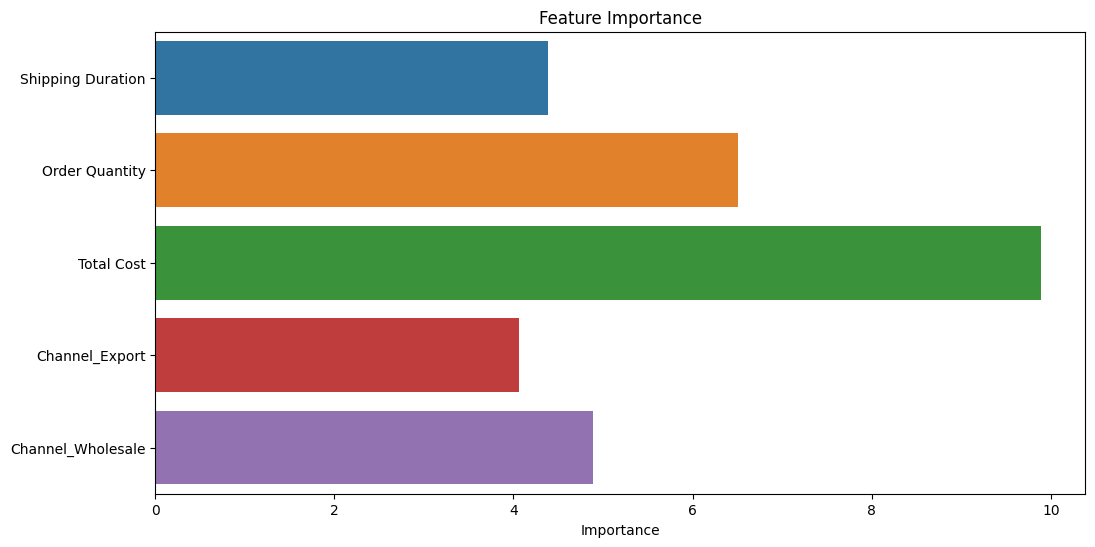

In [ ]:
# Create a horizontal bar plot
plt.figure(figsize = (12, 6))
sns.barplot(data=feature_table, y='Features', x='Importance', hue='Features', dodge=False, legend=False)
plt.title('Feature Importance')
plt.ylabel('')
plt.show()

In [ ]:
# write data on bigquery
from pandas_gbq import to_gbq

to_gbq(prediction_table, 'transactional_data.prediction_table', project_id=project_id, chunksize=None, if_exists='replace')
to_gbq(feature_table, 'transactional_data.feature_importance_table', project_id=project_id, chunksize=None, if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 9915.61it/s]
